In [21]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv(".\dataset\ScaledDiabetes.csv",sep="\t",index_col=0)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [13]:
features=list(df.columns[:-1])
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [16]:
from sklearn.decomposition import PCA

def apply_pca(n):
    
    pca=PCA(n_components=n)
    out=pca.fit_transform(df[features])
    return pca,pd.DataFrame(out)

In [17]:
pca,_=apply_pca(8)

In [19]:
pca.explained_variance_ratio_

array([0.26179749, 0.21640127, 0.12870373, 0.10944113, 0.09529305,
       0.08532855, 0.05247702, 0.05055776])

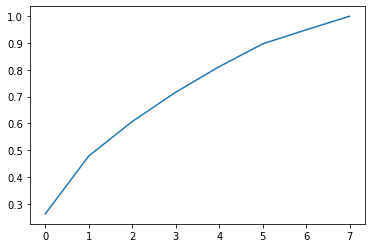

In [22]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [65]:
_,pcaDf=apply_pca(5)
Y=df["Outcome"]
pcaDf.head()

,0,1,2,3,4
0,1.068503,1.234895,0.095930,0.496990,-0.109985
1,-1.121683,-0.733852,-0.712938,0.285056,-0.389507
2,-0.396477,1.595876,1.760678,-0.070395,0.906474
3,-1.115781,-1.271241,-0.663729,-0.579123,-0.356060
4,2.359334,-2.184819,2.963107,4.033099,0.592684


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [67]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(pcaDf,Y,test_size=.2)

In [68]:
model=LogisticRegression().fit(Xtrain,Ytrain)

In [69]:
Ypred=model.predict(Xtest)

In [70]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [71]:
accuracy_score(Ytest,Ypred)

0.7922077922077922

In [72]:
precision_score(Ytest,Ypred)

0.7727272727272727

In [73]:
recall_score(Ytest,Ypred)

0.6071428571428571